# Titanic EDA & Feature Engineering 🚢🧠

This notebook performs exploratory data analysis (EDA) and feature engineering for the Titanic dataset.
It includes:
- Data overview
- Missing value analysis
- Feature distributions
- Correlations
- Feature engineering
- Saving the processed dataset for modeling

In [1]:
# 1. Imports
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Add src folder to Python path so we can import features.py
sys.path.append("../src")
from features import add_features

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## 2. Load Data
We use the provided `train.csv` (with labels) and `test.csv` (without labels). 

In [2]:
# 2. Load data
train = pd.read_csv("../data/raw/train.csv")
test = pd.read_csv("../data/raw/test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()

Train shape: (891, 12)
Test shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Data Overview
Check column types, missing values, and initial impressions.

In [3]:
# Overview
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Check missing values
missing = train.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(train) * 100).round(2)
missing_df = pd.DataFrame({"Missing": missing, "%": missing_percent})
missing_df

,Missing,%
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Name,0,0.00
Pclass,0,0.00
Survived,0,0.00
Sex,0,0.00
Parch,0,0.00
SibSp,0,0.00


## 4. Target Variable (Survived)
Let’s see the distribution of survival in the training data.

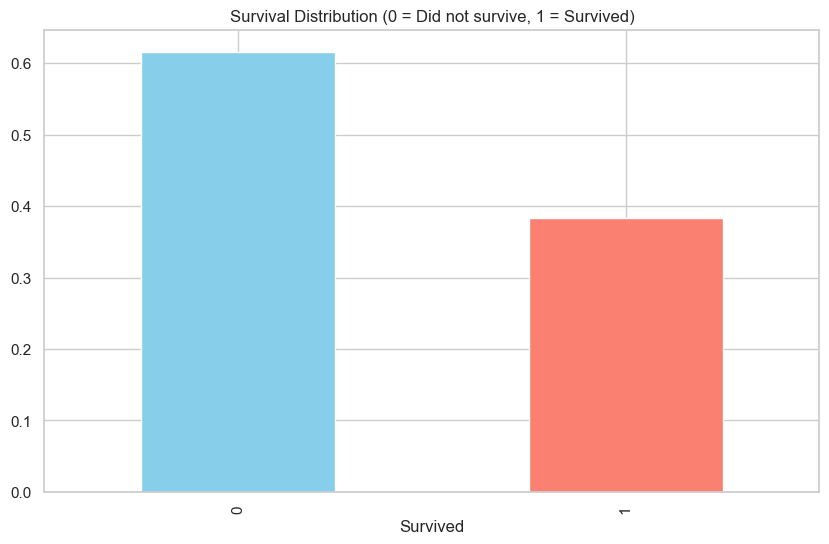

In [5]:
# Target distribution
train["Survived"].value_counts(normalize=True).plot(
    kind="bar",
    color=["skyblue", "salmon"],
    title="Survival Distribution (0 = Did not survive, 1 = Survived)"
)
plt.show()

## 5. Univariate Analysis
Explore individual feature distributions to spot outliers, skewness, and general passenger characteristics.

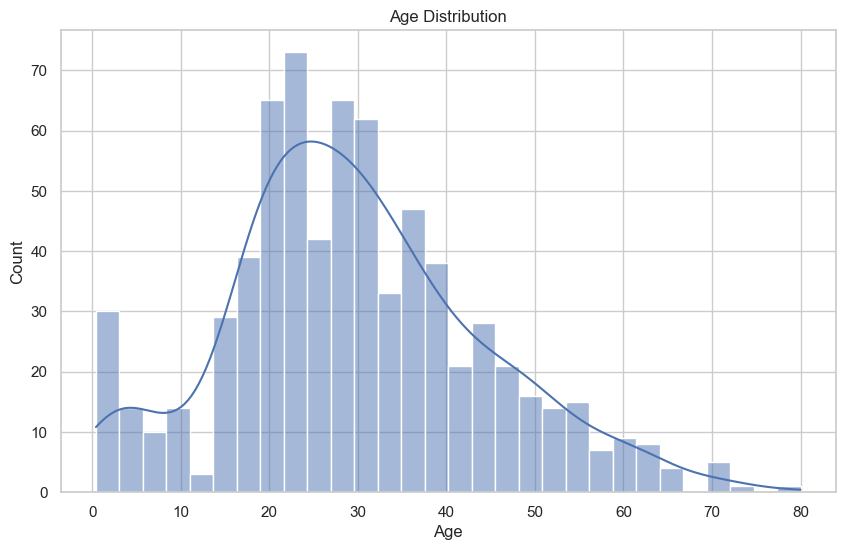

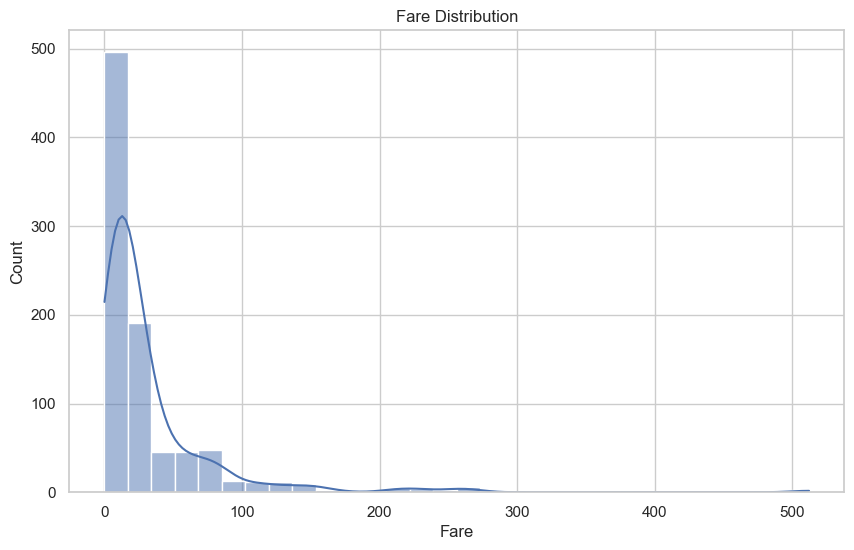

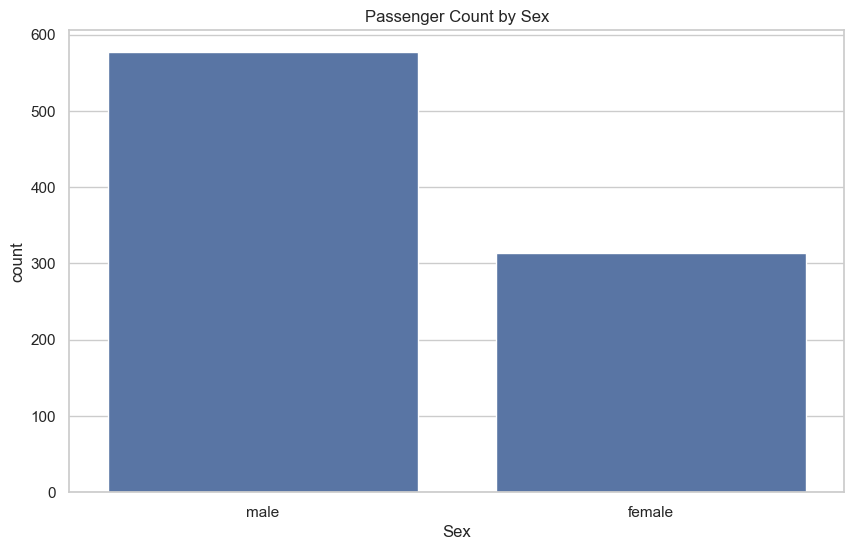

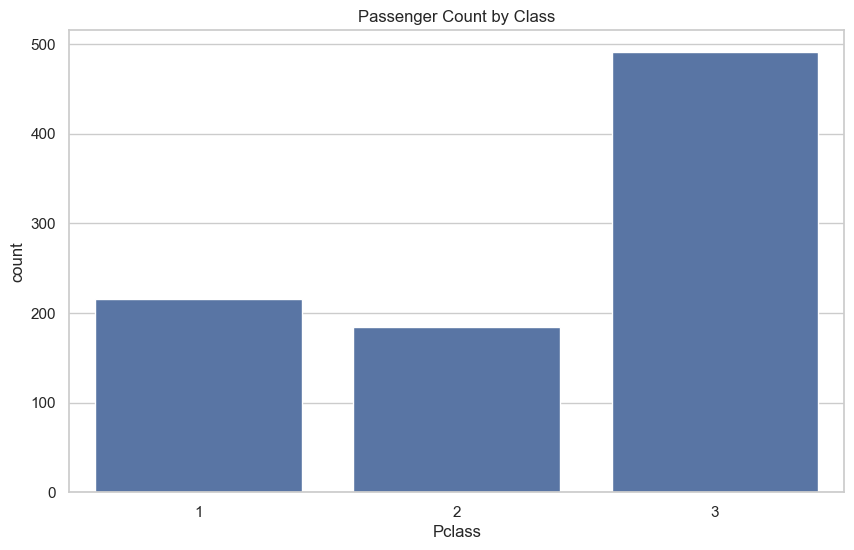

In [6]:
# Age distribution
sns.histplot(train["Age"].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Fare distribution
sns.histplot(train["Fare"], bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()

# Sex counts
sns.countplot(x="Sex", data=train)
plt.title("Passenger Count by Sex")
plt.show()

# Passenger class counts
sns.countplot(x="Pclass", data=train)
plt.title("Passenger Count by Class")
plt.show()


## 6. Bivariate Analysis
Now, let’s see how different features correlate with survival.

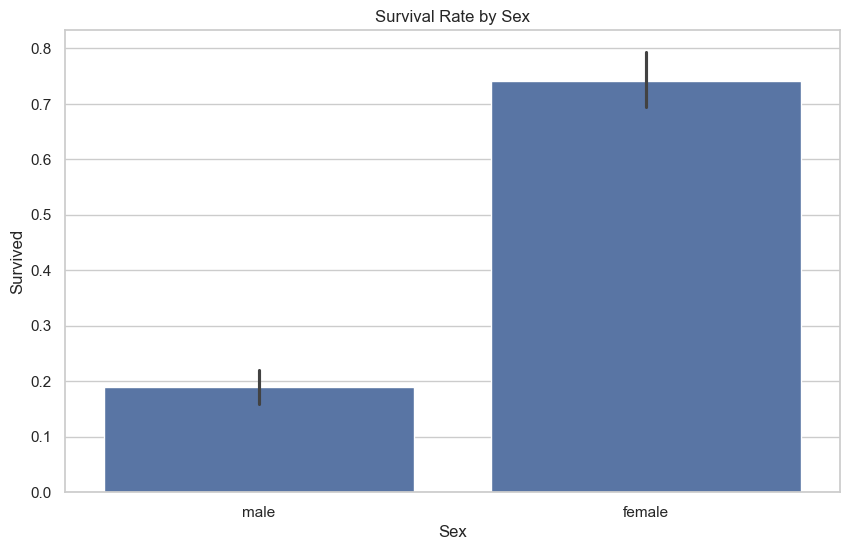

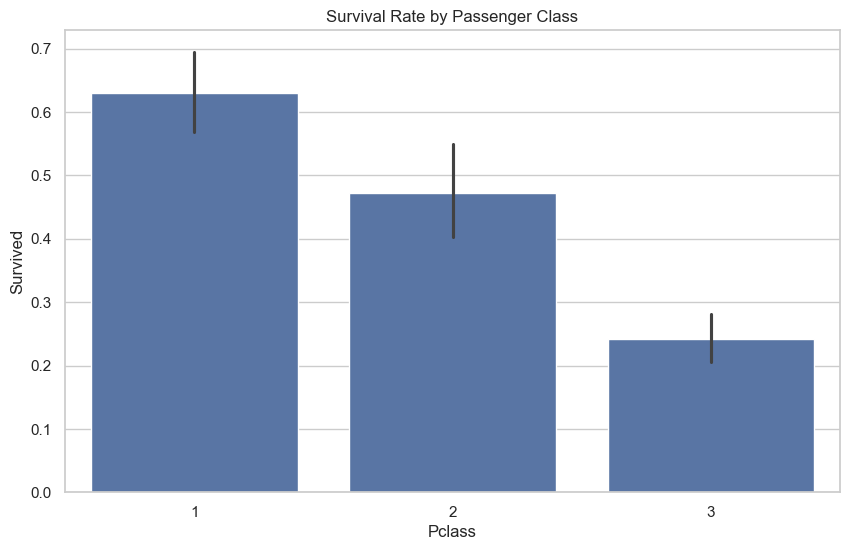

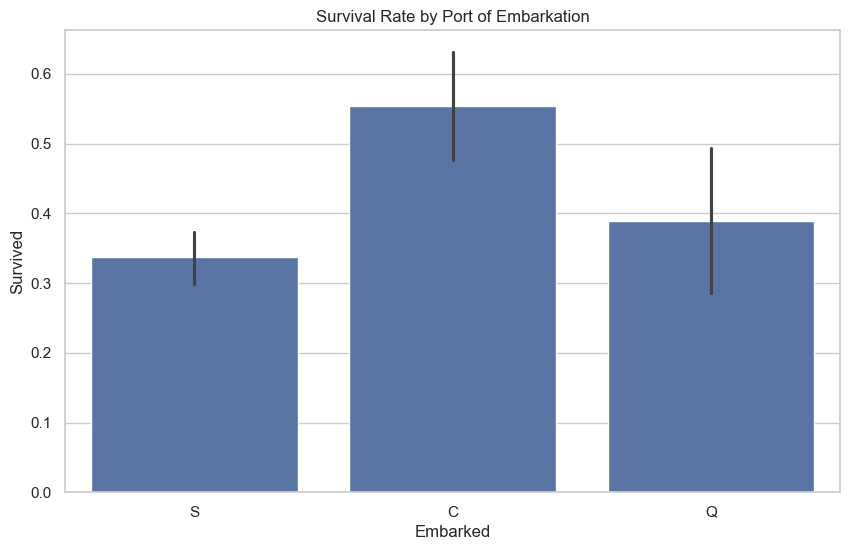

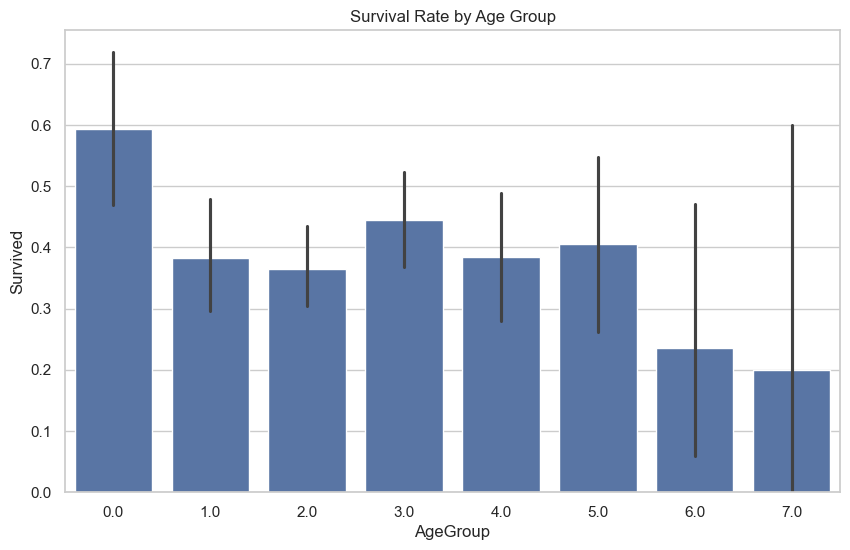

In [7]:
# Survival by Sex
sns.barplot(x="Sex", y="Survived", data=train)
plt.title("Survival Rate by Sex")
plt.show()

# Survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train)
plt.title("Survival Rate by Passenger Class")
plt.show()

# Survival by Embarked
sns.barplot(x="Embarked", y="Survived", data=train)
plt.title("Survival Rate by Port of Embarkation")
plt.show()

# Age groups
train["AgeGroup"] = pd.cut(train["Age"], bins=[0,10,20,30,40,50,60,70,80], labels=False)
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.title("Survival Rate by Age Group")
plt.show()

## 7. Crosstab Summaries
Quick tabulations of survival across categorical features.

In [8]:
print("Survival by Sex:")
print(pd.crosstab(train["Sex"], train["Survived"], normalize="index"))

print("\nSurvival by Pclass:")
print(pd.crosstab(train["Pclass"], train["Survived"], normalize="index"))

Survival by Sex:
Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908

Survival by Pclass:
Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


## 8. Feature Engineering Ideas
Some potential new features that may help models capture hidden patterns.

In [9]:
# Apply Titanic-specific features
df = add_features(train)

# Group rare titles (less than 10 occurrences)
rare_titles = df["Title"].value_counts()[df["Title"].value_counts() < 10].index
df["Title"] = df["Title"].replace(rare_titles, "Rare")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3.0,1,1,Mr


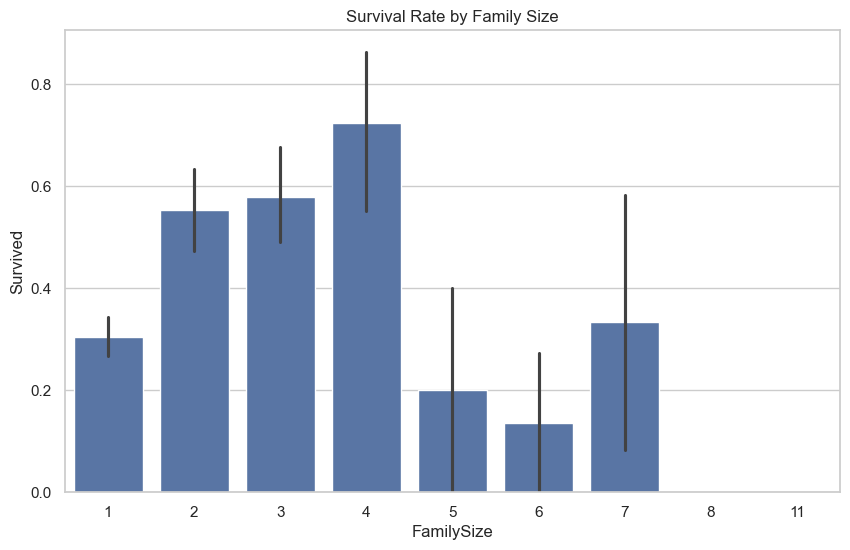

In [10]:
# Family size feature
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
sns.barplot(x="FamilySize", y="Survived", data=train)
plt.title("Survival Rate by Family Size")
plt.show()

## 9. Correlation Heatmap
Correlations among numeric features (e.g., Age, Fare, SibSp, Parch).

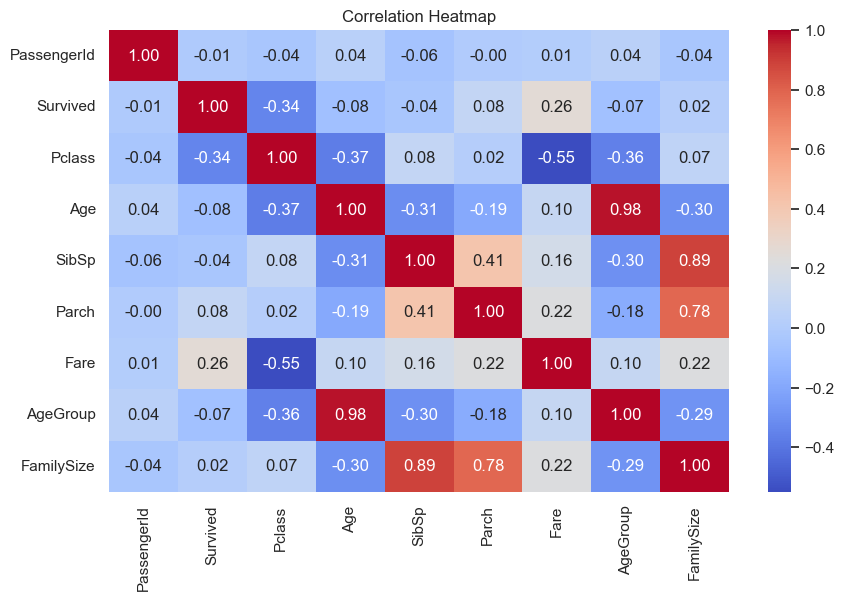

In [11]:
corr = train.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [12]:
# Make sure the processed directory exists
os.makedirs("data/processed", exist_ok=True)

In [13]:
# Save processed dataset
df.to_csv("data/processed/processed_titanic.csv", index=False)
print("Processed dataset saved to data/processed/processed_titanic.csv")

Processed dataset saved to data/processed/processed_titanic.csv


## 10. Summary Insights

- Women had much higher survival rates than men.  
- 1st class passengers had better survival chances than 3rd class.  
- Younger children and families had higher survival rates.  
- Fare shows some positive correlation with survival.  
- Missing data exists in **Age** and **Cabin** columns (to handle later).  

These findings will guide our **feature engineering** and **model building** in the next steps.